In [1]:
from rascil.processing_components import create_visibility_from_ms
from visibilities import *
from images import *
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers
from scipy import signal
import pandas as pd

plt.set_loglevel("critical")
cmap='turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]

wavelet_type_dict = {"daubechies" : 0, "iuwt" : 1}

wavelet_type = "daubechies"
wavelet_type_idx = wavelet_type_dict[wavelet_type]

runtests = False
niter = 100

## Original Databases

In [2]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[va] = create_visibility_from_ms('../data/SGRA.ms')
[vb] = create_visibility_from_ms('../data/SGRB.ms')
[vc] = create_visibility_from_ms('../data/SGRC.ms')

cell_size = 0.00001849451

dirty_a, psf_a = dirty_psf_from_visibilities(va,cell_size,npix=512,weighting="uniform")
dirty_b, psf_b = dirty_psf_from_visibilities(vb,cell_size,npix=512,weighting="uniform")
dirty_c, psf_c = dirty_psf_from_visibilities(vc,cell_size,npix=512,weighting="uniform")

logging.getLogger().setLevel(logging.NOTSET)

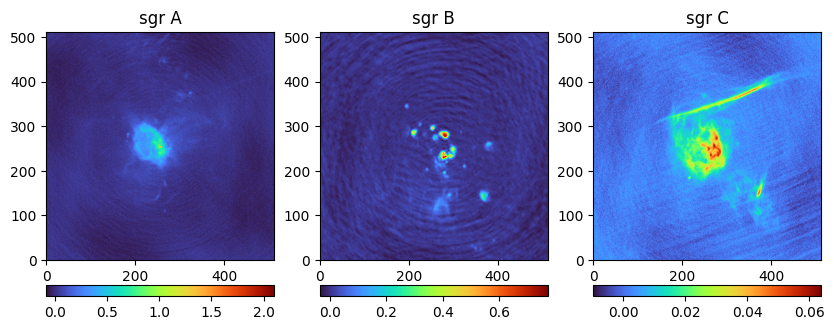

In [3]:
helpers.plotNImages([dirty_a.pixels.data[0,0,:,:], dirty_b.pixels.data[0,0,:,:], \
                     dirty_c.pixels.data[0,0,:,:]], ["sgr A", "sgr B", "sgr C"], cmap)

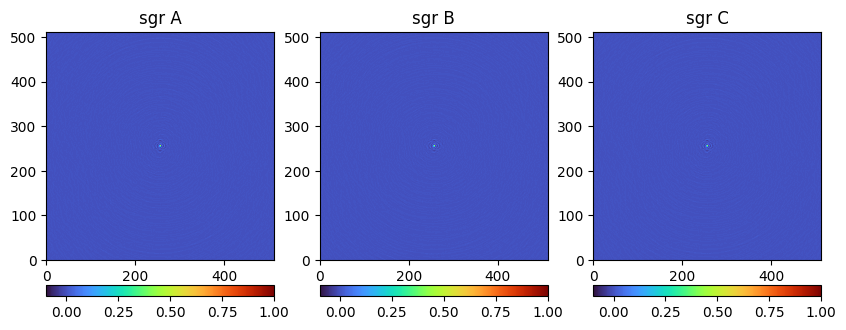

In [4]:
helpers.plotNImages([psf_a.pixels.data[0,0,:,:], psf_b.pixels.data[0,0,:,:], psf_c.pixels.data[0,0,:,:]], ["sgr A", "sgr B", "sgr C"], cmap)

## Cuts to visibilities

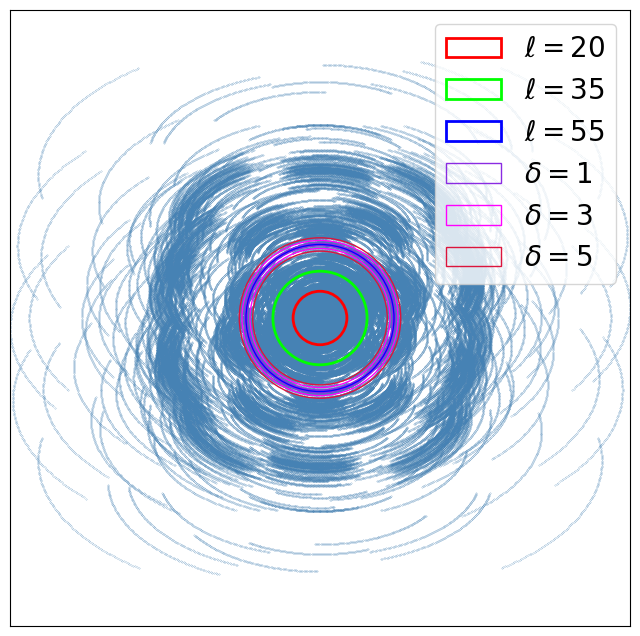

In [5]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

nrows,nbaselines, _ = va.uvw.shape
uv = va.visibility_acc.uvw_lambda[...,0:2]
uv = uv.reshape(nrows*nbaselines,2)

centers = [20, 35, 55]
center_cols = ["red", "lime", "blue"]

halfwidths = [1, 3, 5]
halfwidth_cols = ["blueviolet", "fuchsia", "crimson"]


#plt.title('Visibility cut centers')
max_xy = numpy.max([numpy.max(numpy.fabs(uv[:,0])), numpy.max(numpy.fabs(uv[:,1]))])
plt.scatter(uv[:,0],uv[:,1],c='steelblue',marker='.', s=0.1)
plt.scatter(-uv[:,0],-uv[:,1],c='steelblue',marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.xlim([-max_xy, max_xy])
plt.ylim([-max_xy, max_xy])
ax = plt.gca()

for i, center in enumerate(centers):
    center_lambda = center / (512 * cell_size)
    circ = plt.Circle((0, 0), center_lambda, edgecolor=center_cols[i], facecolor="none", lw=2, label="$\ell=" + str(center) + "$")
    ax.add_patch(circ)
    
center_lambda = 55 / (512 * cell_size)

for i, hw in enumerate(halfwidths):
    outer = (55 + hw) / (512 * cell_size)
    inner = (55 - hw) / (512 * cell_size)
    circ_outer = plt.Circle((0, 0), outer, edgecolor=halfwidth_cols[i], facecolor="none", lw=1, label="$\delta=" + str(hw) + "$")
    circ_inner = plt.Circle((0, 0), inner, edgecolor=halfwidth_cols[i], facecolor="none", lw=1)
    ax.add_patch(circ_outer)
    ax.add_patch(circ_inner)

plt.legend(loc="upper right", fontsize=20)
    
plt.savefig("../figures/partition_centers.png", bbox_inches='tight')

## Different Halfwidths

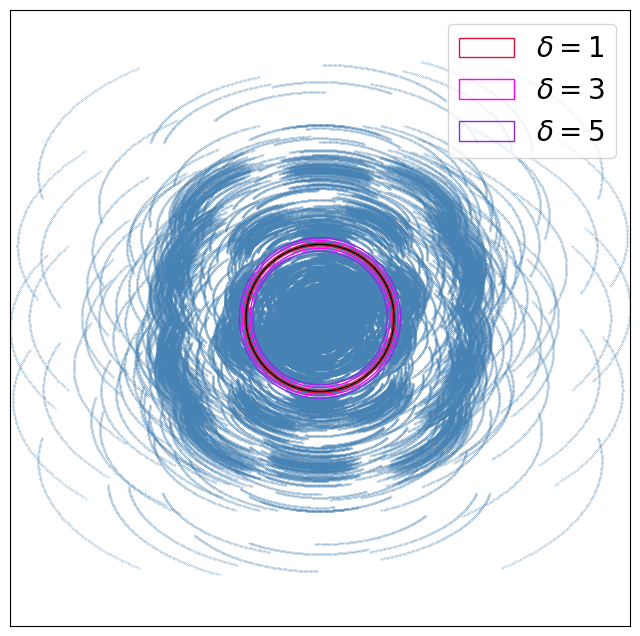

In [6]:
halfwidths = [1, 3, 5]
halfwidth_cols = ["crimson", "fuchsia", "blueviolet"]

#plt.title('Visibility cut halfwidths')
plt.scatter(uv[:,0],uv[:,1],c='steelblue',marker='.', s=0.1)
plt.scatter(-uv[:,0],-uv[:,1],c='steelblue',marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.xlim([-max_xy, max_xy])
plt.ylim([-max_xy, max_xy])
ax = plt.gca()

center_lambda = 55 / (512 * cell_size)

for i, hw in enumerate(halfwidths):
    outer = (55 + hw) / (512 * cell_size)
    inner = (55 - hw) / (512 * cell_size)
    circ_outer = plt.Circle((0, 0), outer, edgecolor=halfwidth_cols[i], facecolor="none", lw=1, label="$\delta=" + str(hw) + "$")
    circ_inner = plt.Circle((0, 0), inner, edgecolor=halfwidth_cols[i], facecolor="none", lw=1)
    ax.add_patch(circ_outer)
    ax.add_patch(circ_inner)
    
plt.legend(loc="upper right", fontsize=20)

circ = plt.Circle((0, 0), center_lambda, edgecolor="black", facecolor="none", lw=1)
ax.add_patch(circ)
    
plt.savefig("../figures/partition_halfwidths.png", bbox_inches='tight')

## Long and Small baseline databases

### Difference between halfwidths

In [7]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

matplotlib.rcParams['figure.figsize'] = [10, 5]

[va1l] = create_visibility_from_ms('../data4/SGRA_long_baselines_19.ms')
[va1s] = create_visibility_from_ms('../data4/SGRA_small_baselines_21.ms')
[va3l] = create_visibility_from_ms('../data4/SGRA_long_baselines_17.ms')
[va3s] = create_visibility_from_ms('../data4/SGRA_small_baselines_23.ms')
[va5l] = create_visibility_from_ms('../data4/SGRA_long_baselines_15.ms')
[va5s] = create_visibility_from_ms('../data4/SGRA_small_baselines_25.ms')

dirty_a1l, psf_a1l = dirty_psf_from_visibilities(va1l,cell_size,npix=512,weighting="uniform")
dirty_a1s, psf_a1s = dirty_psf_from_visibilities(va1s,cell_size,npix=512,weighting="uniform")
dirty_a3l, psf_a3l = dirty_psf_from_visibilities(va3l,cell_size,npix=512,weighting="uniform")
dirty_a3s, psf_a3s = dirty_psf_from_visibilities(va3s,cell_size,npix=512,weighting="uniform")
dirty_a5l, psf_a5l = dirty_psf_from_visibilities(va5l,cell_size,npix=512,weighting="uniform")
dirty_a5s, psf_a5s = dirty_psf_from_visibilities(va5s,cell_size,npix=512,weighting="uniform")

logging.getLogger().setLevel(logging.NOTSET)

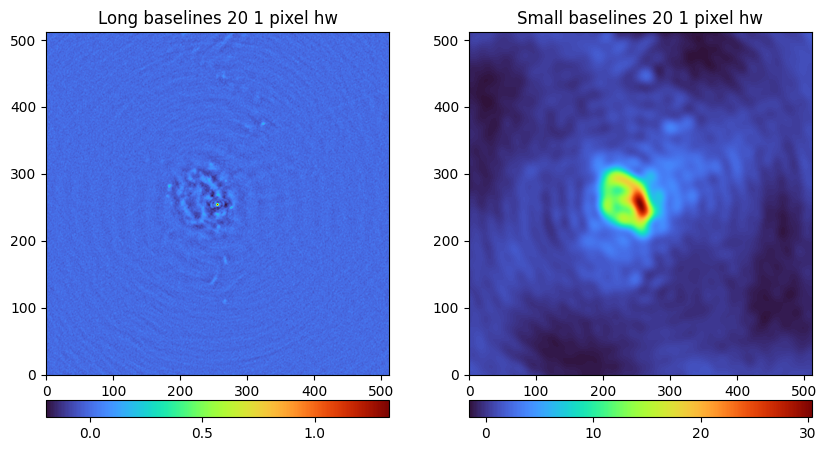

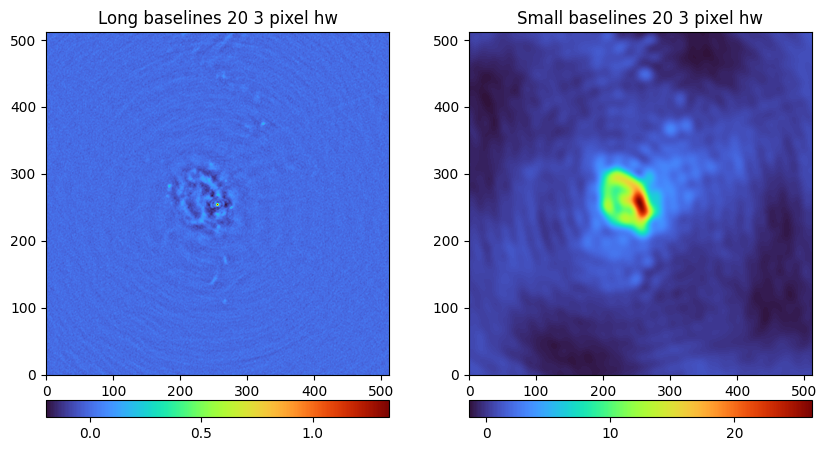

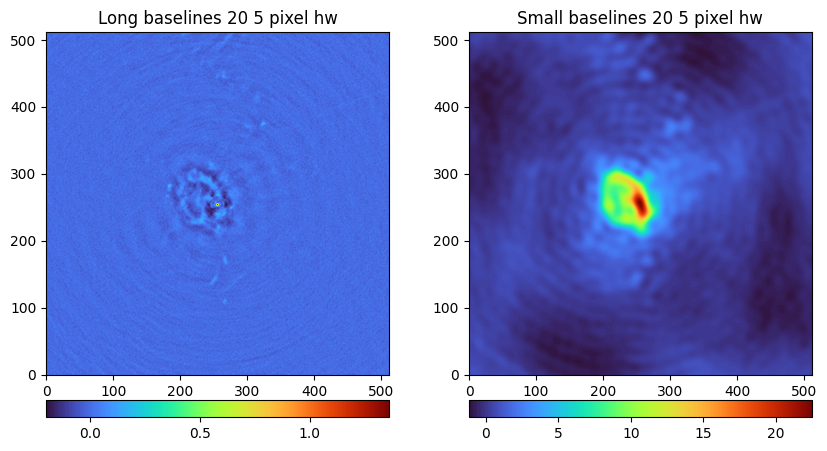

In [8]:
helpers.plotNImages([dirty_a1l.pixels.data[0,0,:,:], dirty_a1s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 1 pixel hw", "Small baselines 20 1 pixel hw"], cmap)
helpers.plotNImages([dirty_a3l.pixels.data[0,0,:,:], dirty_a3s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 3 pixel hw", "Small baselines 20 3 pixel hw"], cmap)
helpers.plotNImages([dirty_a5l.pixels.data[0,0,:,:], dirty_a5s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 5 pixel hw", "Small baselines 20 5 pixel hw"], cmap)

### Difference between cuts

#### sgr A

In [9]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('../data4/SGRA_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('../data4/SGRA_small_baselines_25.ms')
[val2] = create_visibility_from_ms('../data4/SGRA_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('../data4/SGRA_small_baselines_40.ms')
[val3] = create_visibility_from_ms('../data4/SGRA_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('../data4/SGRA_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "../data/SGRA_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "../data/SGRA_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "../data/SGRA_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "../data/SGRA_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "../data/SGRA_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "../data/SGRA_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "../data/SGRA_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "../data/SGRA_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "../data/SGRA_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "../data/SGRA_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "../data/SGRA_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "../data/SGRA_high50_dirty.fits")

logging.getLogger().setLevel(logging.NOTSET)

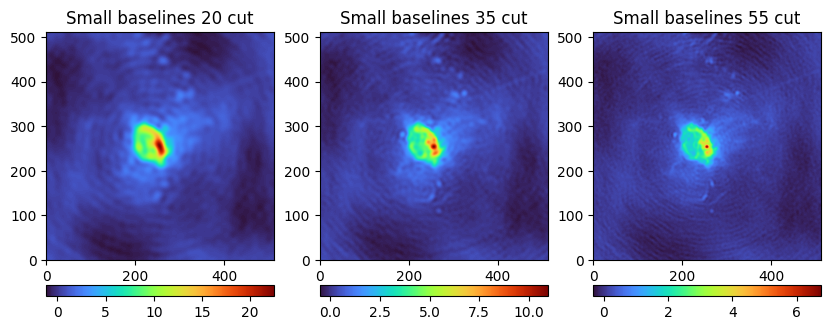

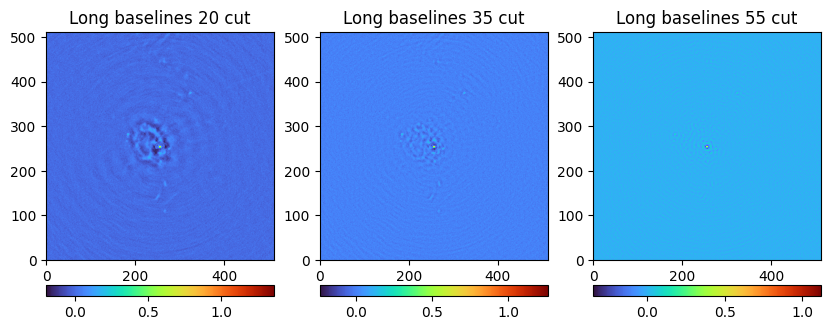

In [10]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

#### sgr B

In [11]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('../data4/SGRB_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('../data4/SGRB_small_baselines_25.ms')
[val2] = create_visibility_from_ms('../data4/SGRB_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('../data4/SGRB_small_baselines_40.ms')
[val3] = create_visibility_from_ms('../data4/SGRB_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('../data4/SGRB_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "../data/SGRB_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "../data/SGRB_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "../data/SGRB_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "../data/SGRB_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "../data/SGRB_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "../data/SGRB_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "../data/SGRB_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "../data/SGRB_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "../data/SGRB_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "../data/SGRB_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "../data/SGRB_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "../data/SGRB_high50_dirty.fits")


logging.getLogger().setLevel(logging.NOTSET)

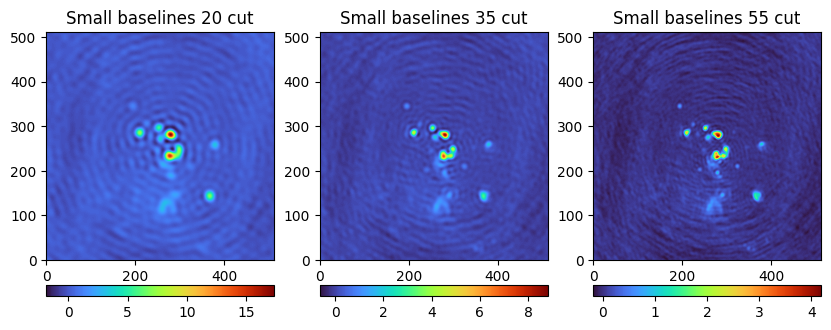

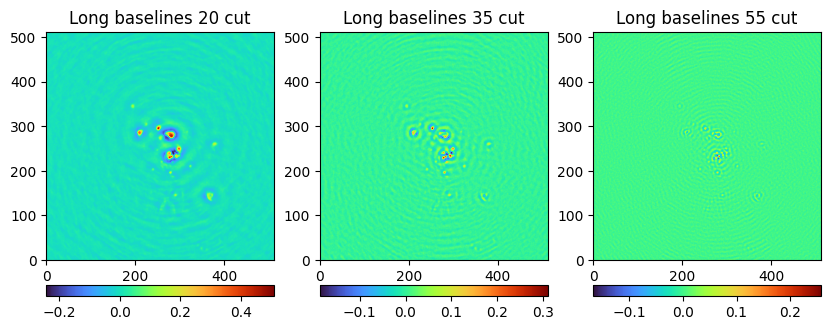

In [12]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

#### sgr C

In [13]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('../data4/SGRC_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('../data4/SGRC_small_baselines_25.ms')
[val2] = create_visibility_from_ms('../data4/SGRC_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('../data4/SGRC_small_baselines_40.ms')
[val3] = create_visibility_from_ms('../data4/SGRC_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('../data4/SGRC_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "../data/SGRC_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "../data/SGRC_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "../data/SGRC_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "../data/SGRC_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "../data/SGRC_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "../data/SGRC_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "../data/SGRC_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "../data/SGRC_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "../data/SGRC_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "../data/SGRC_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "../data/SGRC_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "../data/SGRC_high50_dirty.fits")

logging.getLogger().setLevel(logging.NOTSET)

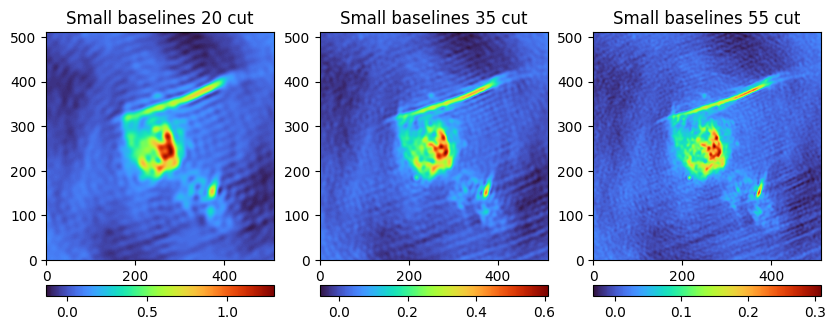

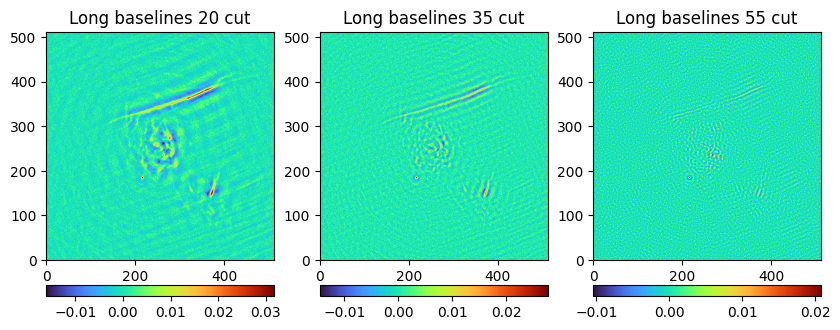

In [14]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

## Simulations for construction accuracy across different cuts

In [15]:
gts = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

cuts = [20, 35, 55]
hws = [5, 3, 1]
dataset_names = ["Sgr A", "Sgr B2", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

data = []

for i, dataset in enumerate(actual_names):
    curr_data = [dataset]
    for cut in cuts:
        for hw in hws:
            filename = "../results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/high/" + \
                dataset + "_long_baselines_" + str(cut - hw) + "_nmoment4_cip_deconvolved.fits"
            recon = helpers.readFits(filename)
            psnr = helpers.compute_snr(gts[i], recon)
            curr_data.append(psnr)
            
    data.append(curr_data)

In [16]:
pd.DataFrame(data, columns=["Dataset", "$\ell=20$, $\delta=5$", "$\ell=20$, $\delta=3$", "$\ell=20$, $\delta=1$", \
        "$\ell=35$, $\delta=5$", "$\ell=35$, $\delta=3$", "$\ell=35$, $\delta=1$", \
        "$\ell=55$, $\delta=5$", "$\ell=55$, $\delta=3$", "$\ell=55$, $\delta=1$"])

Dataset  $\ell=20$, $\delta=5$  $\ell=20$, $\delta=3$  \
0    SGRA              21.670692              22.753876   
1    SGRB              20.829469              21.119095   
2    SGRC              18.322895              19.201803   

   $\ell=20$, $\delta=1$  $\ell=35$, $\delta=5$  $\ell=35$, $\delta=3$  \
0              22.561959              21.473485              22.106303   
1              20.540620              21.259138              21.788510   
2              19.001583              19.143617              19.668364   

   $\ell=35$, $\delta=1$  $\ell=55$, $\delta=5$  $\ell=55$, $\delta=3$  \
0              22.543727              21.959501              21.657455   
1              22.096380              23.146857              22.765652   
2              19.712512              19.165490              18.818663   

   $\ell=55$, $\delta=1$  
0              21.494363  
1              22.614004  
2              18.627881

### Test to check how much estimating $\sigma^2$ and $\eta^2$ impacts PSNR

In [17]:
%%capture
logging.getLogger().setLevel(logging.CRITICAL)

if runtests:
    num_maj_cycles = 5
    initial_lambda = 0.05
    lmul = 2
    ell = 20
    delta = 5
    dataset = "SGRA"
    full_cellsize = 0.00001849451
    
    [vl] = create_visibility_from_ms('../data4/' + dataset + '_long_baselines_' + str(ell - delta) + '.ms')
    initial_low_name = "../results/cut_results/" + dataset + "/" + str(ell) + "/" + str(delta) + "hw/low/" + \
        dataset + "_small_baselines_" + str(ell + delta) + "_nmoment4_cip_deconvolved.fits"

    dirty, psf = dirty_psf_from_visibilities(vl, full_cellsize, npix=512, weighting="uniform")
    dirty = dirty.pixels.data[0, 0, :, :]
    psf = psf.pixels.data[0, 0, :, :]
    final_deconvolved = numpy.zeros(dirty.shape)

    low_in = lr_images[0].fits.open(initial_low_name)
    while len(low_in.shape) > 2:
        low_in = low_in[0]

    vis_noise = 4.262045e-06
    recon_noise = 1.557855e-09

    for maj_iteration in range(0, num_maj_cycles):
        deconv = deconvolve(dirty, psf, low_in, niter, wavelet_type_idx, maj_iteration, initial_lambda, lmul, \
                            cut_center=ell, cut_halfwidth=delta, lowin=low_in, vis_variance=vis_noise, \
                            recon_variance=recon_noise)
        final_deconvolved += deconv
        low_in = low_in - deconv

        #de/gridding
        im.pixels.data = [[final_deconvolved]]
        vdec = vl.copy(deep=True)
        vdec = predict_ng(vdec,im,context='2d')
        vres = helpers.subtractVis(vl, vdec)
        model = create_image_from_visibility(vres,cellsize=full_cellsize,npixel=512)
        dirty, sumwt = invert_ng(vres, model, context='2d')
        dirty = dirty.pixels.data

        while len(dirty.shape) > 2:
            dirty = dirty[0]

    psnr = helpers.compute_snr(helpers.readFits("data/SGRC_full_gt.fits"), final_deconvolved)

logging.getLogger().setLevel(logging.NOTSET)

In [18]:
%%capture
logging.getLogger().setLevel(logging.CRITICAL)

if runtests:
    num_maj_cycles = 5
    initial_lambda = 0.05
    lmul = 2
    ell = 20
    delta = 5
    dataset = "SGRA"
    full_cellsize = 0.00001849451
    
    [vl] = create_visibility_from_ms('../data4/' + dataset + '_long_baselines_' + str(ell - delta) + '.ms')
    initial_low_name = "../results/cut_results/" + dataset + "/" + str(ell) + "/" + str(delta) + "hw/low/" + \
        dataset + "_small_baselines_" + str(ell + delta) + "_nmoment4_cip_deconvolved.fits"

    dirty, psf = dirty_psf_from_visibilities(vl, full_cellsize, npix=512, weighting="uniform")
    dirty = dirty.pixels.data[0, 0, :, :]
    psf = psf.pixels.data[0, 0, :, :]
    final_deconvolved = numpy.zeros(dirty.shape)

    low_in = lr_images[0].fits.open(initial_low_name)
    while len(low_in.shape) > 2:
        low_in = low_in[0]

    for maj_iteration in range(0, num_maj_cycles):
        deconv = deconvolve(dirty, psf, low_in, niter, wavelet_type_idx, maj_iteration, initial_lambda, lmul, \
                            cut_center=ell, cut_halfwidth=delta, lowin=low_in, recon_variance_factor=1000)
        final_deconvolved += deconv
        low_in = low_in - deconv

        #de/gridding
        im.pixels.data = [[final_deconvolved]]
        vdec = vl.copy(deep=True)
        vdec = predict_ng(vdec,im,context='2d')
        vres = helpers.subtractVis(vl, vdec)
        model = create_image_from_visibility(vres,cellsize=full_cellsize,npixel=512)
        dirty, sumwt = invert_ng(vres, model, context='2d')
        dirty = dirty.pixels.data

        while len(dirty.shape) > 2:
            dirty = dirty[0]

    psnr = helpers.compute_snr(helpers.readFits("../data/SGRC_full_gt.fits"), final_deconvolved)

logging.getLogger().setLevel(logging.NOTSET)

In [19]:
if runtests:
    helpers.plotNImages([final_deconvolved, final_deconvolved_auto], ["PSNR = " + str(psnr), "PSNR = " + str(psnr_auto)], cmap)

## Evaluation of PSNRs across the major cycles for both Low and Multistep

In [20]:
gts_multistep = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

gts_low = [[[helpers.readFits("../data/SGRA_low25_gt.fits"), helpers.readFits("../data/SGRA_low23_gt.fits"), helpers.readFits("../data/SGRA_low21_gt.fits")], \
            [helpers.readFits("../data/SGRA_low40_gt.fits"), helpers.readFits("../data/SGRA_low38_gt.fits"), helpers.readFits("../data/SGRA_low36_gt.fits")], \
            [helpers.readFits("../data/SGRA_low60_gt.fits"), helpers.readFits("../data/SGRA_low58_gt.fits"), helpers.readFits("../data/SGRA_low56_gt.fits")]], \
            [[helpers.readFits("../data/SGRB_low25_gt.fits"), helpers.readFits("../data/SGRB_low23_gt.fits"), helpers.readFits("../data/SGRB_low21_gt.fits")], \
            [helpers.readFits("../data/SGRB_low40_gt.fits"), helpers.readFits("../data/SGRB_low38_gt.fits"), helpers.readFits("../data/SGRB_low36_gt.fits")], \
            [helpers.readFits("../data/SGRB_low60_gt.fits"), helpers.readFits("../data/SGRB_low58_gt.fits"), helpers.readFits("../data/SGRB_low56_gt.fits")]], \
            [[helpers.readFits("../data/SGRC_low25_gt.fits"), helpers.readFits("../data/SGRC_low23_gt.fits"), helpers.readFits("../data/SGRC_low21_gt.fits")], \
            [helpers.readFits("../data/SGRC_low40_gt.fits"), helpers.readFits("../data/SGRC_low38_gt.fits"), helpers.readFits("../data/SGRC_low36_gt.fits")], \
            [helpers.readFits("../data/SGRC_low60_gt.fits"), helpers.readFits("../data/SGRC_low58_gt.fits"), helpers.readFits("../data/SGRC_low56_gt.fits")]]]

cuts = [20, 35, 55]
hws = [5, 3, 1]
dataset_names = ["Sgr A", "Sgr B2", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

data_low = []
data_high = []

noiseless = False
weight = "uniform"
lambdam = 2

for i, dataset in enumerate(actual_names):
    high_gt = gts_multistep[i]
    for j, cut in enumerate(cuts):
        for k, hw in enumerate(hws):
            curr_data_low = [dataset + " " + str(cut) + " " + str(hw)]
            curr_data_high = [dataset + " " + str(cut) + " " + str(hw)]
            
            path = "../results/noiseless_cut_results/" + weighting + "/" + dataset + "/" + str(cut) + "/" + str(hw) + \
                "hw/high/lambda_m" + str(lmult) + "/" if noiseless else \
                "../results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/bphigh/lambda_m" + str(lambdam) + "/"
            
            low_gt = gts_low[i][j][k]
            
            curr_deconv_low = None
            curr_deconv_high = None
            for maj_iter in range(0, 5):
                high_filename = path + "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                low_filename = "../results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/low/" + \
                    "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                deconv_low = helpers.readFits(low_filename)
                deconv_high = helpers.readFits(high_filename)
                
                if curr_deconv_low is None:
                    curr_deconv_low = deconv_low
                else:
                    curr_deconv_low += deconv_low
                
                if curr_deconv_high is None:
                    curr_deconv_high = deconv_high
                else:
                    curr_deconv_high += deconv_high
                
                psnr_low = helpers.compute_snr(low_gt, curr_deconv_low)
                psnr_high = helpers.compute_snr(high_gt, curr_deconv_high)
                #psnr_low = helpers.compute_rmse(low_gt, curr_deconv_low)
                #psnr_high = helpers.compute_rmse(high_gt, curr_deconv_high)
                dirtyfn = path + "dirty_iteration_" + str(maj_iter) + "_channel_0.fits"
                high_dirty = helpers.readFits(dirtyfn)
                #psnr_high = numpy.linalg.norm(high_dirty)
                curr_data_low.append(psnr_low)
                curr_data_high.append(psnr_high)
                
                #if maj_iter == 4:
                #    print(psnr_high)
                #    helpers.plotNImages([curr_deconv_high, high_gt], ["", ""], cmap=cmap, same_scale=True)
            
            data_low.append(curr_data_low)
            data_high.append(curr_data_high)

### Low

In [21]:
pd.DataFrame(data_low, columns=["Dataset", "1", "2", "3", "4", "5"])

Dataset          1          2          3          4          5
0   SGRA 20 5  15.737383  21.652870  24.249003  25.559406  25.866440
1   SGRA 20 3  15.644386  21.299643  24.731900  27.268875  29.151940
2   SGRA 20 1  15.785018  21.623775  24.976671  27.290549  28.738231
3   SGRA 35 5  15.496068  20.854497  22.827921  24.077457  24.378475
4   SGRA 35 3  15.778110  21.404111  23.886622  25.499688  26.191484
5   SGRA 35 1  15.830700  21.618453  24.748810  26.969884  28.333287
6   SGRA 55 5  15.819042  21.574336  24.186597  25.821309  26.551532
7   SGRA 55 3  15.580497  21.161513  23.519022  25.125534  25.812199
8   SGRA 55 1  15.817394  21.456839  23.734403  25.220179  25.852200
9   SGRB 20 5  14.360773  18.803219  20.054828  20.008105  20.891195
10  SGRB 20 3  14.283794  18.663597  20.540127  20.091654  19.555963
11  SGRB 20 1  14.506927  19.166306  21.090502  21.794336  22.208029
12  SGRB 35 5  14.403671  19.328120  21.590490  22.830476  23.155990
13  SGRB 35 3  14.550870  19.447316  21.904671  23.442151  24.200712
14  SGRB 35 1  14.535457  19.535739  22.008161  23.617731  25.002854
15  SGRB 55 5  15.016111  20.655347  23.221796  24.549147  25.289782
16  SGRB 55 3  14.937646  20.437253  22.827762  24.070783  24.721901
17  SGRB 55 1  14.977502  20.478492  22.884434  23.985078  24.627913
18  SGRC 20 5  12.139443  16.867663  18.978796  20.219935  20.849672
19  SGRC 20 3  11.849876  16.274632  18.946691  20.622454  21.761579
20  SGRC 20 1  12.076238  16.681449  19.369483  21.022392  22.056095
21  SGRC 35 5  11.897762  16.383570  18.887335  20.784183  21.632857
22  SGRC 35 3  12.020597  16.600280  19.339072  21.573478  23.085030
23  SGRC 35 1  11.934713  16.371819  19.085005  21.409641  23.442869
24  SGRC 55 5  12.171613  16.831359  19.348019  20.994327  22.127381
25  SGRC 55 3  12.036388  16.667403  19.065269  20.691254  21.670811
26  SGRC 55 1  12.226170  16.918813  19.290320  20.845911  21.704129

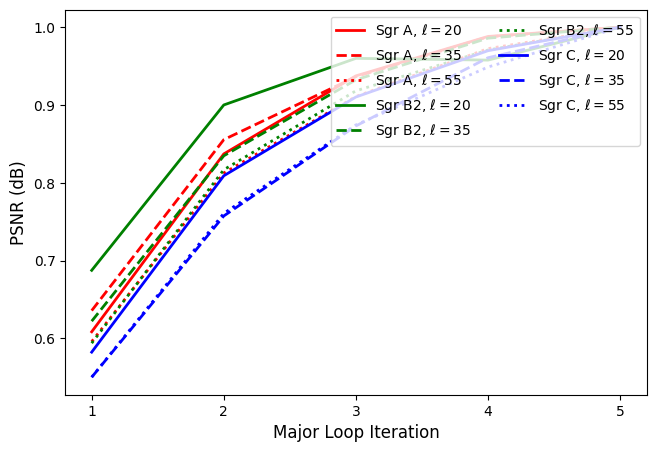

In [22]:
matplotlib.rcParams['figure.figsize'] = [7.5, 5]
from functools import partial

colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
          "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
          "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_low[::3]):
    cleaned_data = data[1:]
    norm_factor = numpy.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]

    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)

plt.xticks([1,2,3,4,5])
    
#plt.legend(loc="lower right", fontsize=10, ncol=2)
plt.legend(loc="upper right", fontsize=10, ncol=2)
#plt.yscale('function', functions=(partial(numpy.power, 2.0), partial(numpy.emath.logn, 2.0)))
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("PSNR (dB)", fontsize=12)
plt.savefig("../figures/low_majcycle_conv.png", bbox_inches='tight')

### Multistep

In [23]:
pd.DataFrame(data_high, columns=["Dataset", "1", "2", "3", "4", "5"])

Dataset          1          2          3          4          5
0   SGRA 20 5  21.601685  21.670692  21.670692  21.670692  21.670692
1   SGRA 20 3  22.688608  22.753876  22.753876  22.753876  22.753876
2   SGRA 20 1  22.513225  22.561959  22.561959  22.561959  22.561959
3   SGRA 35 5  21.464210  21.473485  21.473485  21.473485  21.473485
4   SGRA 35 3  22.097513  22.106303  22.106303  22.106303  22.106303
5   SGRA 35 1  22.536361  22.543727  22.543727  22.543727  22.543727
6   SGRA 55 5  21.959902  21.959501  21.959501  21.959501  21.959501
7   SGRA 55 3  21.658225  21.657453  21.657453  21.657453  21.657453
8   SGRA 55 1  21.495906  21.494317  21.494317  21.494317  21.494317
9   SGRB 20 5  18.373552  20.828674  20.829469  20.829469  20.829469
10  SGRB 20 3  18.800172  21.118930  21.119095  21.119095  21.119095
11  SGRB 20 1  18.573952  20.540511  20.540620  20.540620  20.540620
12  SGRB 35 5  20.543755  21.259138  21.259138  21.259138  21.259138
13  SGRB 35 3  21.134616  21.788510  21.788510  21.788510  21.788510
14  SGRB 35 1  21.530813  22.096380  22.096380  22.096380  22.096380
15  SGRB 55 5  23.059326  23.146857  23.146857  23.146857  23.146857
16  SGRB 55 3  22.699432  22.765591  22.765591  22.765591  22.765591
17  SGRB 55 1  22.565303  22.613737  22.613737  22.613737  22.613737
18  SGRC 20 5  17.988510  18.322895  18.322895  18.322895  18.322895
19  SGRC 20 3  18.799910  19.201803  19.201803  19.201803  19.201803
20  SGRC 20 1  18.633099  19.001583  19.001583  19.001583  19.001583
21  SGRC 35 5  19.125136  19.143617  19.143617  19.143617  19.143617
22  SGRC 35 3  19.652593  19.668364  19.668364  19.668364  19.668364
23  SGRC 35 1  19.702392  19.712512  19.712512  19.712512  19.712512
24  SGRC 55 5  19.166625  19.165490  19.165490  19.165490  19.165490
25  SGRC 55 3  18.819500  18.818661  18.818661  18.818661  18.818661
26  SGRC 55 1  18.629465  18.627843  18.627843  18.627843  18.627843

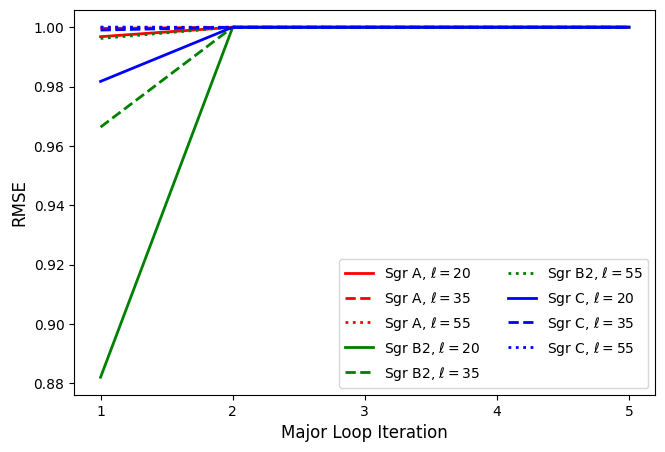

In [24]:
colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
         "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
         "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_high[::3]):
    cleaned_data = data[1:]
    norm_factor = numpy.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]
    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)
    
plt.legend(loc="lower right",  fontsize=10, ncol=2)
plt.xticks([1,2,3,4,5])

plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.savefig("../figures/high_majcycle_conv.png", bbox_inches='tight')

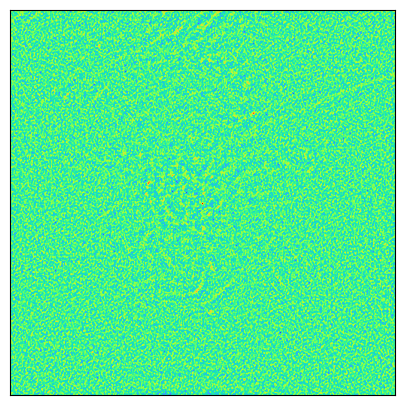

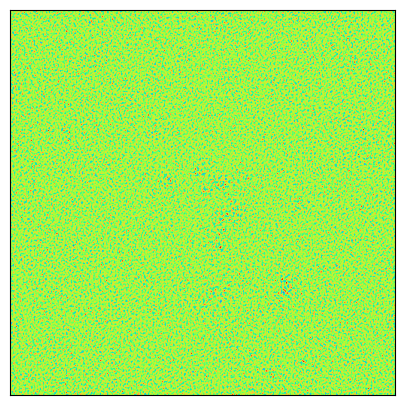

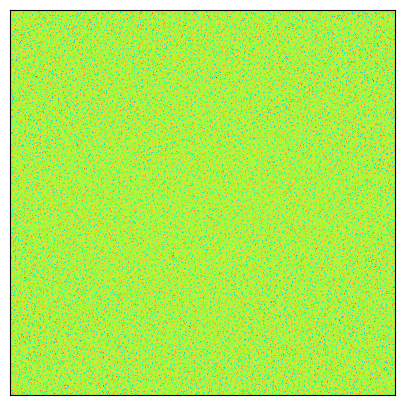

In [25]:
aresid = helpers.readFits("../results/cut_results/SGRA/20/5hw/high/dirty_iteration_2_channel_0.fits")
bresid = helpers.readFits("../results/cut_results/SGRB/55/5hw/high/dirty_iteration_2_channel_0.fits")
cresid = helpers.readFits("../results/cut_results/SGRC/55/5hw/high/dirty_iteration_2_channel_0.fits")

helpers.plotNImages([aresid], [""], output_file="../figures/aresid_high.png", cmap=cmap, hide_ticks=True)
helpers.plotNImages([bresid], [""], output_file="../figures/bresid_high.png", cmap=cmap, hide_ticks=True)
helpers.plotNImages([cresid], [""], output_file="../figures/cresid_high.png", cmap=cmap, hide_ticks=True)

## Evaluation of convergence within FISTA for low and high

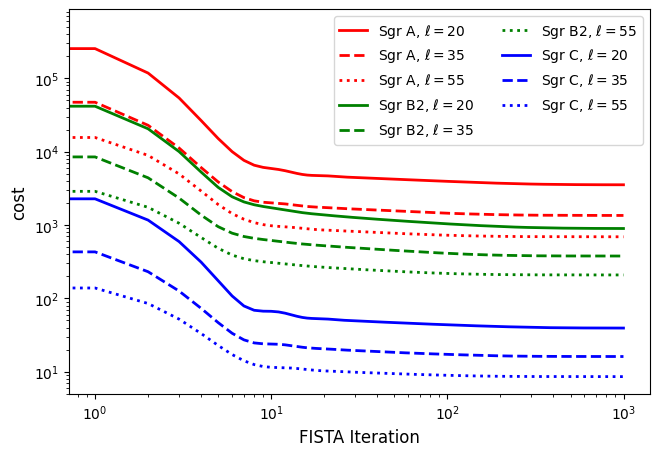

In [26]:
cuts = [20, 35, 55]
actual_names = ["SGRA", "SGRB", "SGRC"]
matplotlib.rcParams['figure.figsize'] = [7.5, 5]

colours = ['r', 'g', 'b']
lstyles = ['-', '--', ':']
labels = [["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$"], \
         ["Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$"], \
         ["Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]]

for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):

        csv_name = "../results/cut_results/fista_convergence/" + dataset + "_cost_low" + str(cut + 5) + ".csv"
        data = helpers.read_csv(csv_name)
        data = data[1:]
        data = [float(x) for x in data]
        
        plt.plot(range(0, len(data)), data, c=colours[i], linestyle=styles[j], label=labels[i][j], lw=2)

plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"cost", fontsize=12)
plt.savefig("../figures/low_fista_conv.png", bbox_inches='tight')
        

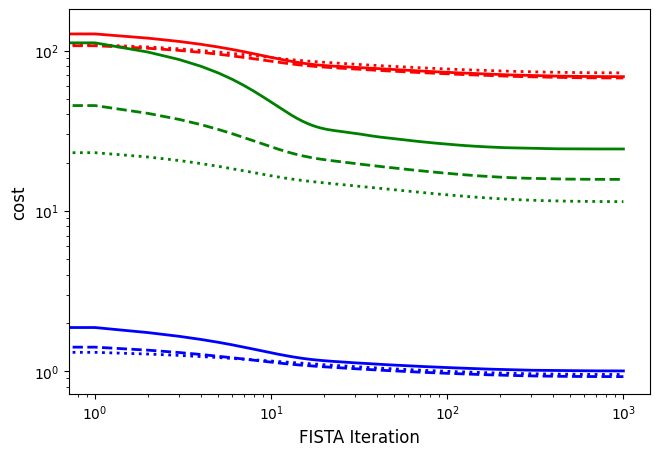

In [27]:
cuts = [20, 35, 55]
actual_names = ["SGRA", "SGRB", "SGRC"]
deltas = [5, 3, 1]

colours = ['r', 'g', 'b']
lstyles = ['-', '--', ':']
labels = [["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$"], \
         ["Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$"], \
         ["Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]]

gts_multistep = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

for i, dataset in enumerate(actual_names):
    high_gt = gts_multistep[0]
    for j, cut in enumerate(cuts):
        csv_name = "../results/cut_results/fista_convergence/" + dataset + "_cost_high" + str(cut + 5) + ".csv"
        data = helpers.read_csv(csv_name)
        data = data[1:]
        data = [float(x) for x in data]
        
        plt.plot(range(0, len(data)), data, c=colours[i], linestyle=styles[j], label=labels[i][j], lw=2)

#plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"cost", fontsize=12)
plt.savefig("../figures/high_fista_conv.png", bbox_inches='tight')
        

### Example residuals

## Comparison against full reconstruction

### Accuracy of final full constructions

In [28]:
from visibilities import compute_residual

[va] = create_visibility_from_ms('../data/SGRA.ms')
[vb] = create_visibility_from_ms('../data/SGRB.ms')
[vc] = create_visibility_from_ms('../data/SGRC.ms')

#done for all three mainly for weight computation
dirtya, psfa = dirty_psf_from_visibilities(va,cell_size,npix=512,weighting="uniform")
dirtyb, psfb = dirty_psf_from_visibilities(vb,cell_size,npix=512,weighting="uniform")
dirtyc, psfc = dirty_psf_from_visibilities(vc,cell_size,npix=512,weighting="uniform")

create_visibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 249600 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-01 21:35:07.746
create_visibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 249600 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:36:23.132 to 2000-01-01 21:34:23.132


/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


create_visibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 249600 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-01 21:35:07.746


/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -30.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cellsize = 0.000021 radians, 0.001177 degrees
create_image_from_visibility: Cellsize = 1.84945e-05 radians, 0.00105966 degrees
create_image_from_visibility: image shape is (1, 1, 512, 512)


/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


Model image plate scale (arcsec) is 3.814767e+00
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -35.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cellsize = 0.000021 radians, 0.001177 degrees
create_image_from_visibility: Cellsize = 1.84945e-05 radians, 0.00105966 degrees
create_image_from_visibility: image shape is (1, 1, 512, 512)
Model image plate scale (arcsec) is 3.814767e+00
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -30.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cel

In [29]:
sgra_gt = helpers.readFits("../data/SGRA_full_gt.fits")
sgrb_gt = helpers.readFits("../data/SGRB_full_gt.fits")
sgrc_gt = helpers.readFits("../data/SGRC_full_gt.fits")

sgra_deconv = helpers.readFits("../results/cut_results/full_recons/SGRA/SGRA_nmoment4_cip_deconvolved.fits")
sgrb_deconv = helpers.readFits("../results/cut_results/full_recons/SGRB/SGRB_nmoment4_cip_deconvolved.fits")
sgrc_deconv = helpers.readFits("../results/cut_results/full_recons/SGRC/SGRC_nmoment4_cip_deconvolved.fits")

dirtya.pixels.data[0,0,:,:] = sgra_deconv
dirtyb.pixels.data[0,0,:,:] = sgrb_deconv
dirtyc.pixels.data[0,0,:,:] = sgrc_deconv

sgra_resid = compute_residual(dirtya, va, 512, cell_size)
sgrb_resid = compute_residual(dirtyb, vb, 512, cell_size)
sgrc_resid = compute_residual(dirtyc, vc, 512, cell_size)

sgra_snr = helpers.compute_snr(sgra_gt, sgra_deconv)
sgrb_snr = helpers.compute_snr(sgrb_gt, sgrb_deconv)
sgrc_snr = helpers.compute_snr(sgrc_gt, sgrc_deconv)

create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -30.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cellsize = 0.000021 radians, 0.001177 degrees
create_image_from_visibility: Cellsize = 1.84945e-05 radians, 0.00105966 degrees
create_image_from_visibility: image shape is (1, 1, 512, 512)
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -35.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cellsize = 0.000021 radians, 0.001177 degrees
create_image_from_visibility: Cellsize = 1.84945e-05 ra

In [30]:
sgra_mstep_deconv = helpers.readFits("../results/additional_split_results/SGRA/full/SGRA_long_baselines_30_nmoment4_cip_deconvolved.fits")
sgrb_mstep_deconv = helpers.readFits("../results/additional_split_results/SGRB/full/SGRB_long_baselines_30_nmoment4_cip_deconvolved.fits")
sgrc_mstep_deconv = helpers.readFits("../results/additional_split_results/SGRC/full/SGRC_long_baselines_30_nmoment4_cip_deconvolved.fits")

dirtya.pixels.data[0,0,:,:] = sgra_mstep_deconv
dirtyb.pixels.data[0,0,:,:] = sgrb_mstep_deconv
dirtyc.pixels.data[0,0,:,:] = sgrc_mstep_deconv

sgra_mstep_resid = compute_residual(dirtya, va, 512, cell_size)
sgrb_mstep_resid = compute_residual(dirtyb, vb, 512, cell_size)
sgrc_mstep_resid = compute_residual(dirtyc, vc, 512, cell_size)

sgrams_snr = helpers.compute_snr(sgra_gt, sgra_mstep_deconv)
sgrbms_snr = helpers.compute_snr(sgrb_gt, sgrb_mstep_deconv)
sgrcms_snr = helpers.compute_snr(sgrc_gt, sgrc_mstep_deconv)

FileNotFoundError: [Errno 2] No such file or directory: '../results/additional_split_results/SGRA/full/SGRB_long_baselines_30_nmoment4_cip_deconvolved.fits'

In [ ]:
from ska_sdp_func_python.image import fit_psf
from ska_sdp_func_python.image.operations import convert_clean_beam_to_pixels
from astropy.convolution import Gaussian2DKernel, convolve_fft

clean_beam = fit_psf(psfa)
beam_pixels = convert_clean_beam_to_pixels(dirtya, clean_beam)
gk = Gaussian2DKernel(x_stddev=beam_pixels[0], y_stddev=beam_pixels[1], theta=beam_pixels[2])
norm = 2.0 * numpy.pi * beam_pixels[0] * beam_pixels[1]

In [ ]:
sgra_msclean_deconv = helpers.readFits("../results/msclean/SGRA/SGRA_nmoment4_cip_deconvolved.fits")
sgrb_msclean_deconv = helpers.readFits("../results/msclean/SGRB/SGRB_nmoment4_cip_deconvolved.fits")
sgrc_msclean_deconv = helpers.readFits("../results/msclean/SGRC/SGRC_nmoment4_cip_deconvolved.fits")

dirtya.pixels.data[0,0,:,:] = sgra_msclean_deconv
dirtyb.pixels.data[0,0,:,:] = sgrb_msclean_deconv
dirtyc.pixels.data[0,0,:,:] = sgrc_msclean_deconv

sgra_msclean_resid = compute_residual(dirtya, va, 512, cell_size)
sgrb_msclean_resid = compute_residual(dirtyb, vb, 512, cell_size)
sgrc_msclean_resid = compute_residual(dirtyc, vc, 512, cell_size)

sgra_msclean_deconv = convolve_fft(sgra_msclean_deconv, gk, normalize_kernel=False, allow_huge=True, boundary="wrap")
sgrb_msclean_deconv = convolve_fft(sgrb_msclean_deconv, gk, normalize_kernel=False, allow_huge=True, boundary="wrap")
sgrc_msclean_deconv = convolve_fft(sgrc_msclean_deconv, gk, normalize_kernel=False, allow_huge=True, boundary="wrap")

sgramsclean_snr = helpers.compute_snr(sgra_gt, sgra_msclean_deconv)
sgrbmsclean_snr = helpers.compute_snr(sgrb_gt, sgrb_msclean_deconv)
sgrcmsclean_snr = helpers.compute_snr(sgrc_gt, sgrc_msclean_deconv)

In [ ]:
adif = numpy.abs(sgra_gt - sgra_deconv)
amsdif = numpy.abs(sgra_gt - sgra_mstep_deconv)
amscleandif = numpy.abs(sgra_gt - sgra_msclean_deconv)
bdif = numpy.abs(sgrb_gt - sgrb_deconv)
bmsdif = numpy.abs(sgrb_gt - sgrb_mstep_deconv)
bmscleandif = numpy.abs(sgrb_gt - sgrb_msclean_deconv)
cdif = numpy.abs(sgrc_gt - sgrc_deconv)
cmsdif = numpy.abs(sgrc_gt - sgrc_mstep_deconv)
cmscleandif = numpy.abs(sgrc_gt - sgrc_msclean_deconv)


helpers.plotNImages([adif], [""], cmap, scale_mul=0.5, output_file="../figures/full_sgra_abserr.png", same_scale=True, additional_scale_imgs=[amsdif, amscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([amsdif], [""], cmap, scale_mul=0.5, output_file="../figures/mstep_sgra_abserr.png", same_scale=True, additional_scale_imgs=[adif, amscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([amscleandif], [""], cmap, scale_mul=0.5, output_file="../figures/msclean_sgra_abserr.png", same_scale=True, additional_scale_imgs=[adif, amsdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([bdif], [""], cmap, scale_mul=0.5, output_file="../figures/full_sgrb_abserr.png", same_scale=True, additional_scale_imgs=[bmsdif, bmscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([bmsdif], [""], cmap, scale_mul=0.5, output_file="../figures/mstep_sgrb_abserr.png", same_scale=True, additional_scale_imgs=[bdif, bmscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([bmscleandif], [""], cmap, scale_mul=0.5, output_file="../figures/msclean_sgrb_abserr.png", same_scale=True, additional_scale_imgs=[bdif, bmsdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([cdif], [""], cmap, scale_mul=0.5, output_file="../figures/full_sgrc_abserr.png", same_scale=True, additional_scale_imgs=[cmsdif, cmscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([cmsdif], [""], cmap, scale_mul=0.5, output_file="../figures/mstep_sgrc_abserr.png", same_scale=True, additional_scale_imgs=[cdif, cmscleandif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([cmscleandif], [""], cmap, scale_mul=0.5, output_file="../figures/msclean_sgrc_abserr.png", same_scale=True, additional_scale_imgs=[cdif, cmsdif], hide_ticks=True, cbar_labelsize=13)


sgra_resid = np.abs(sgra_resid.pixels.data[0,0,:,:])
sgrb_resid = np.abs(sgrb_resid.pixels.data[0,0,:,:])
sgrc_resid = np.abs(sgrc_resid.pixels.data[0,0,:,:])
sgra_mstep_resid = np.abs(sgra_mstep_resid.pixels.data[0,0,:,:])
sgrb_mstep_resid = np.abs(sgrb_mstep_resid.pixels.data[0,0,:,:])
sgrc_mstep_resid = np.abs(sgrc_mstep_resid.pixels.data[0,0,:,:])
sgra_msclean_resid = np.abs(sgra_msclean_resid.pixels.data[0,0,:,:])
sgrb_msclean_resid = np.abs(sgrb_msclean_resid.pixels.data[0,0,:,:])
sgrc_msclean_resid = np.abs(sgrc_msclean_resid.pixels.data[0,0,:,:])

helpers.plotNImages([sgra_resid], [""], cmap, output_file="../figures/full_sgra_resid.png", same_scale=True, additional_scale_imgs=[sgra_mstep_resid, sgra_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgra_mstep_resid], [""], cmap, output_file="../figures/mstep_sgra_resid.png", same_scale=True, additional_scale_imgs=[sgra_resid, sgra_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgra_msclean_resid], [""], cmap, output_file="../figures/msclean_sgra_resid.png", same_scale=True, additional_scale_imgs=[sgra_resid, sgra_mstep_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrb_resid], [""], cmap, output_file="../figures/full_sgrb_resid.png", same_scale=True, additional_scale_imgs=[sgrb_mstep_resid, sgrb_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrb_mstep_resid], [""], cmap, output_file="../figures/mstep_sgrb_resid.png", same_scale=True, additional_scale_imgs=[sgrb_resid, sgrb_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrb_msclean_resid], [""], cmap, output_file="../figures/msclean_sgrb_resid.png", same_scale=True, additional_scale_imgs=[sgrb_resid, sgrb_mstep_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrc_resid], [""], cmap, output_file="../figures/full_sgrc_resid.png", same_scale=True, additional_scale_imgs=[sgrc_mstep_resid, sgrc_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrc_mstep_resid], [""], cmap, output_file="../figures/mstep_sgrc_resid.png", same_scale=True, additional_scale_imgs=[sgrc_resid, sgrc_msclean_resid], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([sgrc_msclean_resid], [""], cmap, output_file="../figures/msclean_sgrc_resid.png", same_scale=True, additional_scale_imgs=[sgrc_resid, sgrc_mstep_resid], hide_ticks=True, cbar_labelsize=13)


print(sgra_snr)
helpers.plotNImages([sgra_deconv], [""], cmap, output_file="../figures/full_sgra.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgra_mstep_deconv, sgra_msclean_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrb_snr)
helpers.plotNImages([sgrb_deconv], [""], cmap, output_file="../figures/full_sgrb.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrb_mstep_deconv, sgrb_msclean_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrc_snr)
helpers.plotNImages([sgrc_deconv], [""], cmap, output_file="../figures/full_sgrc.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrc_mstep_deconv, sgrc_msclean_deconv], cbar_labelsize=15)

print(sgrams_snr)
helpers.plotNImages([sgra_mstep_deconv], [""], cmap, output_file="../figures/mstep_sgra.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgra_deconv, sgra_msclean_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrbms_snr)
helpers.plotNImages([sgrb_mstep_deconv], [""], cmap, output_file="../figures/mstep_sgrb.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrb_deconv, sgrb_msclean_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrcms_snr)
helpers.plotNImages([sgrc_mstep_deconv], [""], cmap, output_file="../figures/mstep_sgrc.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrc_deconv, sgrc_msclean_deconv], cbar_labelsize=15)

print(sgramsclean_snr)
helpers.plotNImages([sgra_msclean_deconv], [""], cmap, output_file="../figures/msclean_sgra.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgra_deconv, sgra_mstep_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrbmsclean_snr)
helpers.plotNImages([sgrb_msclean_deconv], [""], cmap, output_file="../figures/msclean_sgrb.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrb_deconv, sgrb_mstep_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrcmsclean_snr)
helpers.plotNImages([sgrc_msclean_deconv], [""], cmap, output_file="../figures/msclean_sgrc.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrc_deconv, sgrc_mstep_deconv], cbar_labelsize=15)

In [ ]:
colours = ['r', 'g', 'b']
datasets = ["Sgr A", "Sgr B2", "Sgr C"]
actual_datasets = ["SGRA", "SGRB", "SGRC"]
gts = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

singlestep_fulldata = []
full_recons = []

for i, dataset in enumerate(actual_datasets):
    gt = gts[i]
    curr_data = []
    curr_deconv = None
    for maj_iter in range(0, 10):
        filename = "../results/cut_results/full_recons/" + dataset + "/deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
        deconv = helpers.readFits(filename)

        if curr_deconv is None:
            curr_deconv = deconv
        else:
            curr_deconv += deconv

        psnr = helpers.compute_snr(gt, curr_deconv)

        curr_data.append(psnr)

    singlestep_fulldata.append(curr_data)

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

for i, dataset in enumerate(datasets):
    curr_data = singlestep_fulldata[i]
    
    plt.plot(range(1, 11), curr_data, c=colours[i], label=dataset, lw=3)

plt.legend(loc="lower right", fontsize=12)
plt.xticks(range(1, 11))
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("PSNR (dB)", fontsize=12)
plt.savefig("../figures/full_majcycle_conv.png", bbox_inches='tight')

In [ ]:
dataset_names = ["Sgr A", "Sgr B", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

mstep_fulldata = []

noiseless = False
weight = "uniform"
lambdam = 2

for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    
    snr_full_fullres = []
    snr_low_fullres = []

    path =  "../results/cut_results/" + dataset + "/20/5hw/bphigh/lambda_m" + str(lambdam) + "/"

    low_gt_filter = helpers.bandpass(gt, 0, cut + hw)
    low_gt = signal.fftconvolve(gt, low_gt_filter, mode='same')

    curr_deconv_low = None
    curr_deconv_high = None
    for maj_iter in range(0, 5):
        high_filename = path + "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
        low_filename = "../results/cut_results/" + dataset + "/35/5hw/low/" + \
            "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
        deconv_low = helpers.readFits(low_filename)
        deconv_high = helpers.readFits(high_filename)

        if curr_deconv_low is None:
            curr_deconv_low = deconv_low
        else:
            curr_deconv_low += deconv_low

        if curr_deconv_high is None:
            curr_deconv_high = deconv_high
        else:
            curr_deconv_high += deconv_high

        snr_full_fullres.append(helpers.compute_snr(gt, curr_deconv_high))
        snr_low_fullres.append(helpers.compute_snr(gt, curr_deconv_low))

    mstep_fulldata.append(snr_low_fullres + snr_full_fullres)

In [ ]:
colours = ['r', 'g', 'b']
datasets = ["Sgr A", "Sgr B2", "Sgr C"]
actual_datasets = ["SGRA", "SGRB", "SGRC"]
gts = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

msclean_fulldata = []

for i, dataset in enumerate(actual_datasets):
    gt = gts[i]
    curr_data = []
    curr_deconv = None
    for maj_iter in range(0, 10):
        filename = "../results/msclean/" + dataset + "/mscleanmodel_" + str(maj_iter) + ".fits"
        deconv = helpers.readFits(filename)

        if curr_deconv is None:
            curr_deconv = deconv
        else:
            curr_deconv += deconv
            
        restored = convolve_fft(curr_deconv, gk, normalize_kernel=False, allow_huge=True, boundary="wrap")

        psnr = helpers.compute_snr(gt, restored)
        
        #helpers.plotNImages([restored], [str(psnr)], cmap=cmap)
        
        curr_data.append(psnr)

    msclean_fulldata.append(curr_data)

In [ ]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

for i, dataset in enumerate(datasets):
    curr_data = mstep_fulldata[i]
    
    plt.plot(range(1, 11), curr_data, linestyle='-',c=colours[i], label="mstep " + dataset, lw=3)
    
    curr_sstepdata = singlestep_fulldata[i]
    
    plt.plot(range(1, 11), curr_sstepdata, linestyle=':', c=colours[i], label="sstep " + dataset, lw=3)
    
    curr_mscleandata = msclean_fulldata[i]
    
    plt.plot(range(1, 11), curr_mscleandata, linestyle='--', c=colours[i], label="msclean " + dataset, lw=3)

plt.legend(loc="lower right", fontsize=10, ncol=3)
plt.xticks(range(1, 11))
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("PSNR (dB)", fontsize=12)
plt.savefig("../figures/full_majcycle_conv.png", bbox_inches='tight')

In [ ]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

actual_names = ["SGRA", "SGRB", "SGRC"]

colours = ['r', 'g', 'b']
labels = ["Sgr A", "Sgr B2", "Sgr C"]

test = helpers.readFits("tmp_output.fits")
gt = helpers.readFits("../data/SGRC_full_gt.fits")
print(helpers.compute_snr(gt, test))

for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    csv_name = "../results/cut_results/fista_convergence/" + dataset + "_full.csv"
    data = helpers.read_csv(csv_name)
    data = data[1:]
    data = [float(x) for x in data]
    data = [20 * np.log10(numpy.linalg.norm(gt) / np.sqrt(float(x))) for x in data]
    plt.plot(range(0, len(data)), data, c=colours[i], label=labels[i], lw=3)

plt.xlim([-1, 40])

plt.legend(loc="lower right", fontsize=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"PSNR (dB)", fontsize=12)
plt.savefig("../figures/full_fista_conv.png", bbox_inches='tight')
        

In [ ]:
from scipy import signal

colours = ['r', 'g', 'b']
fullgt = helpers.readFits("../data/SGRA_full_gt.fits")
lowgt = helpers.readFits("../data/SGRA_low25_gt.fits")
delta = 5
cut = 20

low_dat = []
high_dat = []
single_dat = []
single_largescale_dat = []

curr_deconv_single = None
curr_deconv_low = None
curr_deconv_high = None

bpfilter = helpers.bandpass(lowgt, 0, cut + delta)
lowgt_bp = signal.fftconvolve(lowgt, bpfilter, mode='same')

for maj_iter in range(0, 5):
    single_filename = "../results/cut_results/full_recons/SGRA/deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
    low_filename = "../results/cut_results/SGRA/" + str(cut) + "/" + str(delta) + "hw/low/" + \
                        "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
    high_filename = "../results/cut_results/SGRA/" + str(cut) + "/" + str(hw) + "hw/high/" + \
                    "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
    
    deconv_single = helpers.readFits(single_filename)
    deconv_low = helpers.readFits(low_filename)
    deconv_high = helpers.readFits(high_filename)

    if curr_deconv_single is None:
        curr_deconv_single = deconv_single
    else:
        curr_deconv_single += deconv_single
        
    if curr_deconv_low is None:
        curr_deconv_low = deconv_low
    else:
        curr_deconv_low += deconv_low
        
    if curr_deconv_high is None:
        curr_deconv_high = deconv_high
    else:
        curr_deconv_high += deconv_high

    single_bp_deconv = signal.fftconvolve(curr_deconv_single, bpfilter, mode='same')
        
    rmse_single = helpers.compute_rmse(fullgt, curr_deconv_single)
    rmse_low = helpers.compute_rmse(lowgt, curr_deconv_low)
    rmse_high = helpers.compute_rmse(fullgt, curr_deconv_high)
    rmse_single_largescale = helpers.compute_rmse(single_bp_deconv, lowgt_bp)
    
    single_dat.append(rmse_single)
    low_dat.append(rmse_low)
    high_dat.append(rmse_high)
    single_largescale_dat.append(rmse_single_largescale)

plt.plot(range(1, 6), single_dat, c='r', label="single-step", lw=3)
plt.plot(range(1, 6), low_dat, c='g', label="low", lw=3)
plt.plot(range(1, 6), high_dat, c='b', label="full", lw=3)
plt.plot(range(1, 6), single_largescale_dat, c='teal', label="single-step (low)", lw=3)


plt.legend(loc="upper right",  fontsize=10)
plt.xticks([1,2,3,4,5])

plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.savefig("../figures/singlevsmulti_majcyc.png", bbox_inches='tight')

helpers.plotNImages([curr_deconv_single, curr_deconv_low, curr_deconv_high], ["", "", ""], cmap=cmap)

In [ ]:
single_costs = "../results/cut_results/fista_convergence/SGRA_cost_full.csv"
high_costs = "../results/cut_results/fista_convergence/SGRA_cost_high15.csv"
low_costs = "../results/cut_results/fista_convergence/SGRA_cost_low25.csv"

def read_costs(filename):
    data = helpers.read_csv(filename)
    data = data[1:]
    data = [float(x) for x in data]
    
    return data

sc_dat = read_costs(single_costs)
hc_dat = read_costs(high_costs)
lc_dat = read_costs(low_costs)

plt.plot(range(0, len(sc_dat)), sc_dat, c="r", label="single-step", lw=3)
plt.plot(range(0, len(hc_dat)), hc_dat, c="g", label="high", lw=3)
plt.plot(range(0, len(lc_dat)), lc_dat, c="b", label="low", lw=3)

plt.xlim([-1, 100])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"cost", fontsize=12)
plt.savefig("../figures/singlevsmulti_fista_conv.png", bbox_inches='tight')
        

## Aggregate PSNR across all bands for noiseless datasets

In [ ]:
gts_multistep = [helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRB_full_gt.fits"), \
       helpers.readFits("../data/SGRC_full_gt.fits")]

gts_low = [[[helpers.readFits("../data/SGRA_low25_gt.fits"), helpers.readFits("../data/SGRA_low23_gt.fits"), helpers.readFits("../data/SGRA_low21_gt.fits")], \
            [helpers.readFits("../data/SGRA_low40_gt.fits"), helpers.readFits("../data/SGRA_low38_gt.fits"), helpers.readFits("../data/SGRA_low36_gt.fits")], \
            [helpers.readFits("../data/SGRA_low60_gt.fits"), helpers.readFits("../data/SGRA_low58_gt.fits"), helpers.readFits("../data/SGRA_low56_gt.fits")]], \
            [[helpers.readFits("../data/SGRB_low25_gt.fits"), helpers.readFits("../data/SGRB_low23_gt.fits"), helpers.readFits("../data/SGRB_low21_gt.fits")], \
            [helpers.readFits("../data/SGRB_low40_gt.fits"), helpers.readFits("../data/SGRB_low38_gt.fits"), helpers.readFits("../data/SGRB_low36_gt.fits")], \
            [helpers.readFits("../data/SGRB_low60_gt.fits"), helpers.readFits("../data/SGRB_low58_gt.fits"), helpers.readFits("../data/SGRB_low56_gt.fits")]], \
            [[helpers.readFits("../data/SGRC_low25_gt.fits"), helpers.readFits("../data/SGRC_low23_gt.fits"), helpers.readFits("../data/SGRC_low21_gt.fits")], \
            [helpers.readFits("../data/SGRC_low40_gt.fits"), helpers.readFits("../data/SGRC_low38_gt.fits"), helpers.readFits("../data/SGRC_low36_gt.fits")], \
            [helpers.readFits("../data/SGRC_low60_gt.fits"), helpers.readFits("../data/SGRC_low58_gt.fits"), helpers.readFits("../data/SGRC_low56_gt.fits")]]]

cuts = [20, 35, 55]
hws = [5]
dataset_names = ["Sgr A", "Sgr B2", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

data_low = []
data_high = []

weight = "uniform"
lambdam = 2

for i, dataset in enumerate(actual_names):
    high_gt = gts_multistep[i]
    for j, cut in enumerate(cuts):
        for k, hw in enumerate(hws):
            curr_data_low = [dataset + " " + str(cut) + " " + str(hw)]
            curr_data_high = [dataset + " " + str(cut) + " " + str(hw)]
            
            path = "../results/noiseless_cut_results/" + weight + "/" + dataset + "/" + str(cut) + "/" + str(hw) + \
                "hw/high/lambda_m" + str(lambdam) + "/"
            lowpath = "../results/noiseless_cut_results/" + weight + "/" + dataset + "/" + str(cut) + "/" + str(hw) + \
                "hw/low/lambda_m" + str(lambdam) + "/"
            
            low_gt = gts_low[i][j][k]
            
            curr_deconv_low = None
            curr_deconv_high = None
            
            bpfilter = helpers.bandpass(low_gt, 0, hw + cut)
            
            for maj_iter in range(0, 5):
                high_filename = path + "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                low_filename = lowpath + "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                deconv_low = signal.fftconvolve(helpers.readFits(low_filename), bpfilter, mode='same')
                deconv_high = helpers.readFits(high_filename)
                
                if curr_deconv_low is None:
                    curr_deconv_low = deconv_low
                else:
                    curr_deconv_low += deconv_low
                
                if curr_deconv_high is None:
                    curr_deconv_high = deconv_high
                else:
                    curr_deconv_high += deconv_high
                
                psnr_low = helpers.compute_snr(low_gt, curr_deconv_low)
                psnr_high = helpers.compute_snr(high_gt, curr_deconv_high)
                
                curr_data_low.append(psnr_low)
                curr_data_high.append(psnr_high)
                
                #if maj_iter == 4:
                #    helpers.plotNImages([curr_deconv_low, curr_deconv_high, high_gt], ["", "", ""], cmap=cmap, same_scale=True)
            
            data_low.append(curr_data_low)
            data_high.append(curr_data_high)

In [ ]:
pd.DataFrame(data_low, columns=["Dataset", "1", "2", "3", "4", "5"])

In [ ]:
matplotlib.rcParams['figure.figsize'] = [5, 5]

colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
         "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
         "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_low):
    cleaned_data = data[1:]
    norm_factor = np.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]

    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)

plt.xticks([1,2,3,4,5])
    
plt.legend(loc="lower right", fontsize=10, ncol=2)
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("PSNR (dB)", fontsize=12)
plt.savefig("../figures/low_majcycle_conv_noiseless.png", bbox_inches='tight')

In [ ]:
pd.DataFrame(data_high, columns=["Dataset", "1", "2", "3", "4", "5"])

In [ ]:
colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
         "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
         "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_high):
    cleaned_data = data[1:]
    norm_factor = np.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]
    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)


    
plt.legend(loc="lower right", fontsize=12)
plt.xticks([1,2,3,4,5])

plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("Normalized PSNR", fontsize=12)
plt.savefig("../figures/high_majcycle_conv_noiseless.png", bbox_inches='tight')